<a href="https://colab.research.google.com/github/rewatevijaykumar/feature_engineering/blob/master/Date_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Write function in python that inputs dataframe and identify which columns have date in them. Using these date columns make new columns which are difference between these columns takng 2 at a time.

In [231]:
import pandas as pd
import numpy as np
import datetime as dt

In [232]:
"""
#sample data test
# df = pd.read_csv('/content/calendar.csv')
# df = pd.read_csv('/content/dca.csv')
"""

#create dummy data
df = pd.DataFrame({"date1":pd.date_range(dt.date(2020,1,1), dt.date(2020,12,31))[:300],
              "date2":pd.date_range(dt.date(2019,1,1), dt.date(2019,12,31))[:300],
              "date3":pd.date_range(dt.date(2018,1,1), dt.date(2018,12,31))[:300],
             })

#create missing values in dummy dataset
for col in df.columns:
  df[col] = df[col].sample(frac=0.8)
  # length = len(date_cols[i])
  # num = int(0.2*length)
  # idx_replace = np.random.randint(0, length-1, num)
  # df.loc[idx_replace, i] = np.nan


#change dtype of date columns to string for creating df date columns with string data type
for col in df.columns:
  if df[col].dtype=='datetime64[ns]':
    df[col] = df[col].astype(object)

#add name column to df data
df['name'] = 'abcd'

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   240 non-null    object
 1   date2   240 non-null    object
 2   date3   240 non-null    object
 3   name    300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


,date1,date2,date3,name
0,2020-01-01 00:00:00,2019-01-01 00:00:00,2018-01-01 00:00:00,abcd
1,NaT,2019-01-02 00:00:00,2018-01-02 00:00:00,abcd
2,2020-01-03 00:00:00,2019-01-03 00:00:00,2018-01-03 00:00:00,abcd
3,2020-01-04 00:00:00,2019-01-04 00:00:00,NaT,abcd
4,2020-01-05 00:00:00,2019-01-05 00:00:00,2018-01-05 00:00:00,abcd


In [233]:
#handling missing values, difference between columns can be done in this function only. 
#But kept seperate to read and understand code easily
def fetch_date_col(df):
  #convert string date columns to date format by fetching datetime format automatically
  for col in df.columns:
    if df[col].dtype == 'object':
      try:
            df[col] = pd.to_datetime(df[col], infer_datetime_format = True, errors='raise')
      except ValueError:
          pass
  print(df.dtypes)
fetch_date_col(df)

# selecting only datetime columns from dataframe
date_cols = df.select_dtypes(include=[np.datetime64])

#store name of columns having datetime columns
cols=date_cols.columns


date1    datetime64[ns]
date2    datetime64[ns]
date3    datetime64[ns]
name             object
dtype: object


In [234]:
#Handling Missing Date Values
date_cols.info()
"""
#Missing values can be handled in three ways interpolate, forward fill, backward fill

#replace missing values using interpolate
for col in cols:
  date_cols[col] = pd.to_numeric(date_cols[col])
date_cols.interpolate()

# date_cols = date_cols.bfill() #replace missing values with latest known value back-filling
"""
date_cols = date_cols.ffill() #replace missing values with last known value forward-filling
date_cols.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date1   240 non-null    datetime64[ns]
 1   date2   240 non-null    datetime64[ns]
 2   date3   240 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 7.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date1   300 non-null    datetime64[ns]
 1   date2   300 non-null    datetime64[ns]
 2   date3   300 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 7.2 KB


In [235]:
#def for difference between two columns and store result in new column
def diff_date(a,b):
  # diff = (date_cols[col[a]]-date_cols[col[b]]).dt.days #for integer value
  diff = date_cols[a]-date_cols[b]    #for floast value step 1
  diff = diff / np.timedelta64(1, 'D') #for float value step 2
  date_cols[str(a) + '-' + str(b)] = diff #store difference in seperate column

def diff_date_cols(cols):
  """
  #code for difference between all consecutive date columns and last-first column
  #eg.if columns = [date1,date2,date3] diff=[date1-date2,date2-date3,date3-date1]
  
  from itertools import cycle, islice

  rest_cols_cycled = islice(cycle(col), 1, None)
  for i, j in zip(cols, rest_cols_cycled):
    diff_date(i,j)        

  print(date_cols.head())
  

  """
  #code for difference between all consecutive date columns and first-last column
  #eg.if columns = [date1,date2,date3] diff=[date1-date2,date2-date3,date1-date3]
  
  # difference between all consecutive datetime columns except first and last column in order first-last
  for x,i in enumerate(cols):
      for y,j in enumerate(cols):
          if  y-x==1 and i!=j: #check if consecutive and not equal
              diff_date(i,j)

  #difference between first and last column in order first-last
  i=cols[0]   #first column
  j=cols[-1]  #last column
  diff_date(i,j)  #difference between first and last in order first-last  

diff_date_cols(cols)
date_cols.info()
date_cols.head() #display top 5 rows
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date1        300 non-null    datetime64[ns]
 1   date2        300 non-null    datetime64[ns]
 2   date3        300 non-null    datetime64[ns]
 3   date1-date2  300 non-null    float64       
 4   date2-date3  300 non-null    float64       
 5   date1-date3  300 non-null    float64       
dtypes: datetime64[ns](3), float64(3)
memory usage: 14.2 KB


,date1,date2,date3,date1-date2,date2-date3,date1-date3
0,2020-01-01,2019-01-01,2018-01-01,365.0,365.0,730.0
1,2020-01-01,2019-01-02,2018-01-02,364.0,365.0,729.0
2,2020-01-03,2019-01-03,2018-01-03,365.0,365.0,730.0
3,2020-01-04,2019-01-04,2018-01-03,365.0,366.0,731.0
4,2020-01-05,2019-01-05,2018-01-05,365.0,365.0,730.0


2) Write function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

players = pd.read_csv("/content/players.csv")
players.info()
# players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

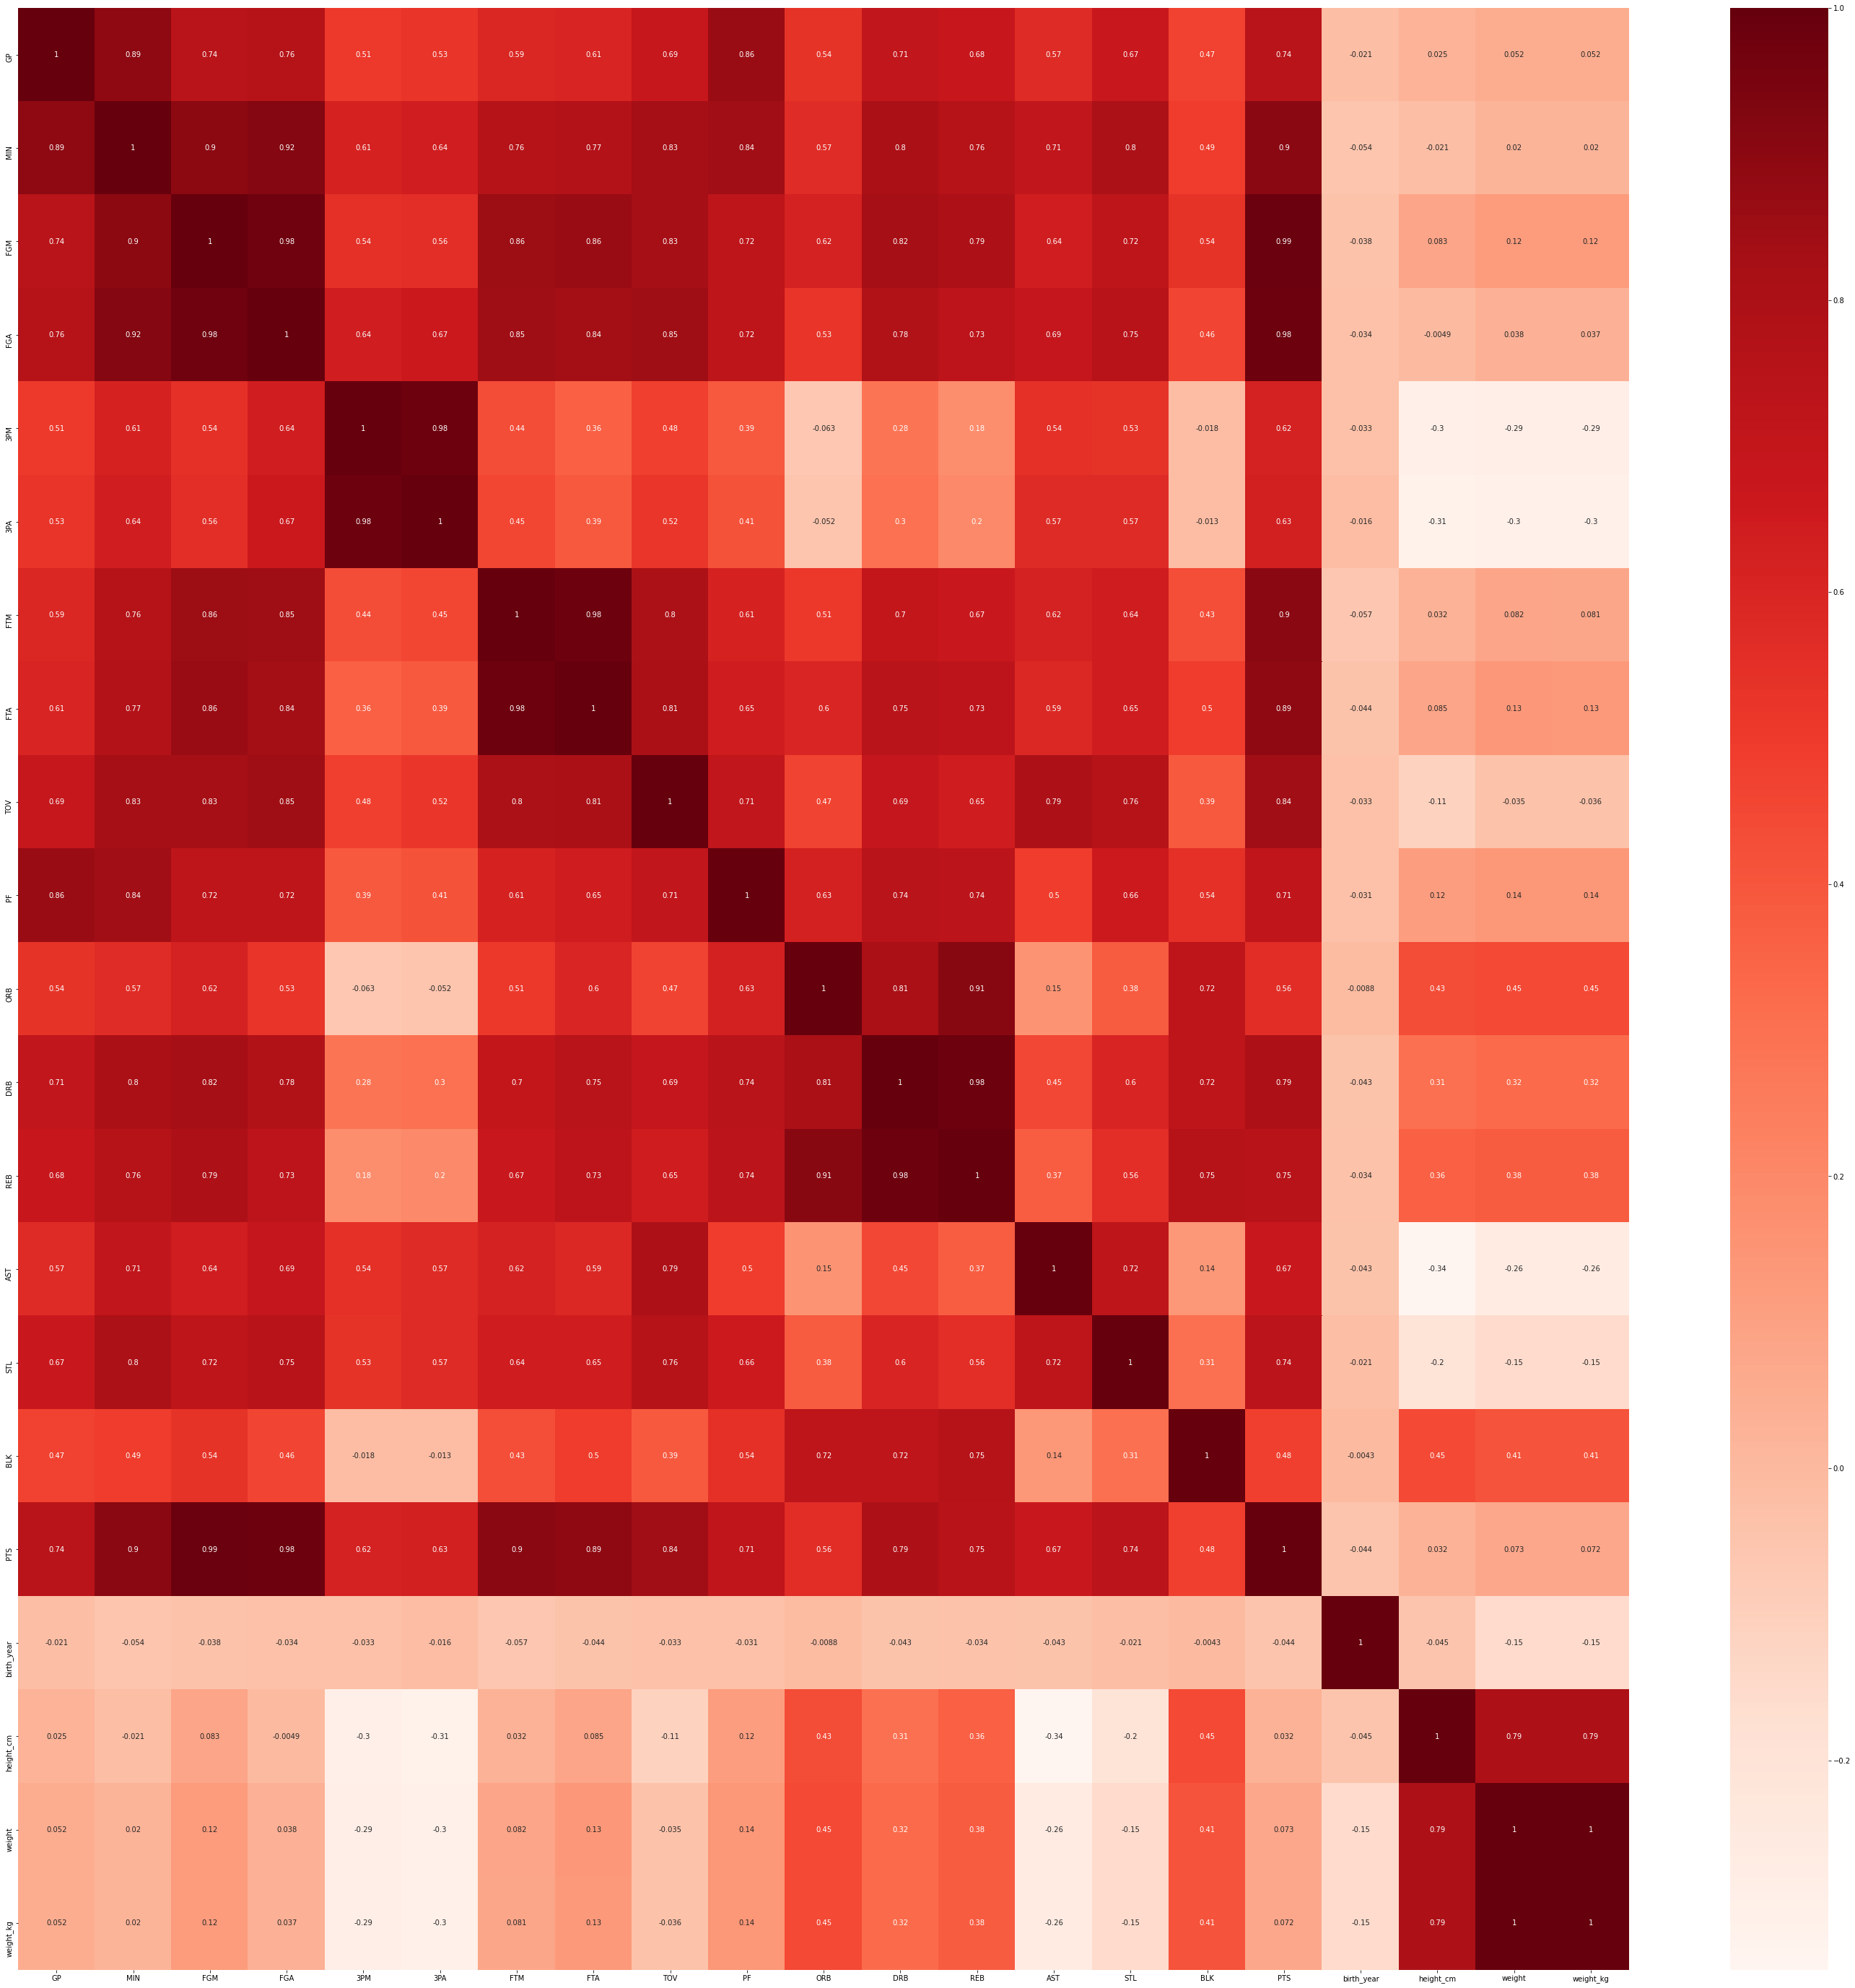

correlatedColumns ['ORB', 'PTS', 'GP', '3PA', 'FGA', 'DRB', 'FGM', 'weight', 'PF', 'MIN', 'FTA', 'REB', 'FTM', '3PM', 'weight_kg']


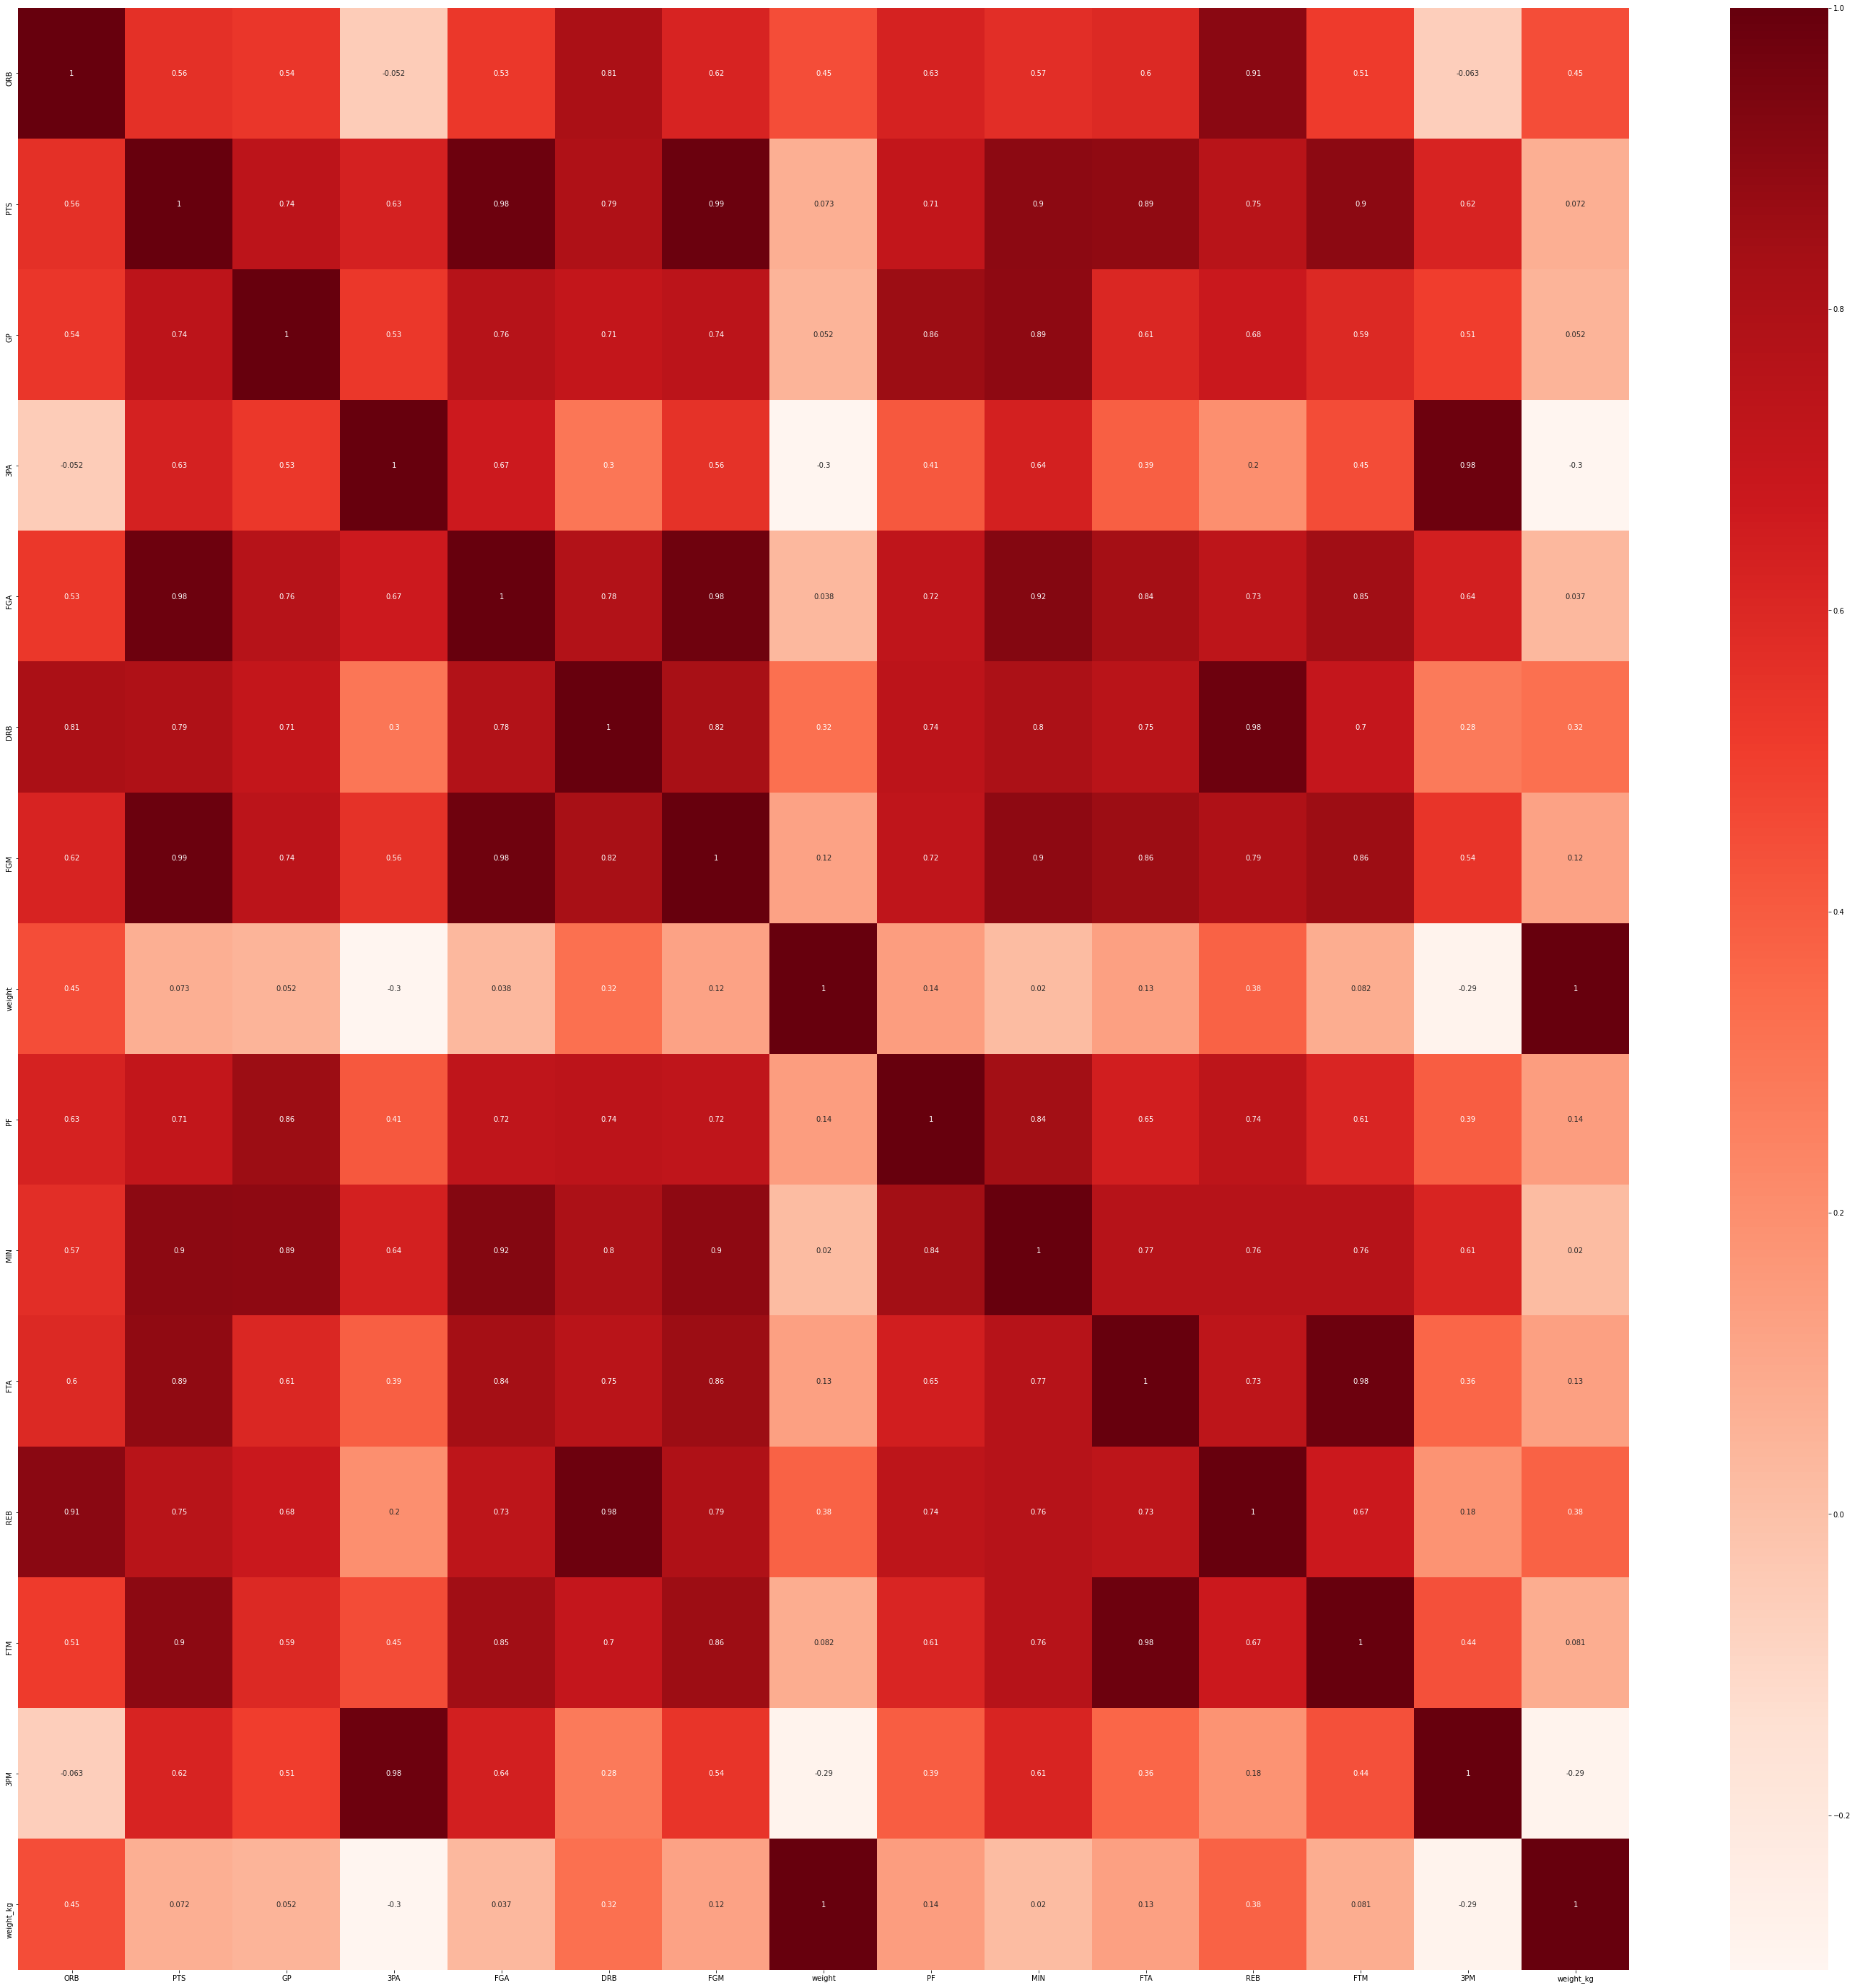

ORB    0.560038
PTS    1.000000
GP     0.737669
3PA    0.628632
FGA    0.982939
DRB    0.792250
FGM    0.989233
PF     0.713750
MIN    0.902028
FTA    0.891460
REB    0.751993
FTM    0.900854
3PM    0.618703
Name: PTS, dtype: float64
DROP_COLS ['ORB', 'GP', '3PA', 'FGA', 'DRB', 'FGM', 'PF', 'MIN', 'FTA', 'REB', 'FTM', '3PM']
Dropping highly correlated features with target
Column_name: ORB
Column_name: GP
Column_name: 3PA
Column_name: FGA
Column_name: DRB
Column_name: FGM
Column_name: PF
Column_name: MIN
Column_name: FTA
Column_name: REB
Column_name: FTM
Column_name: 3PM


In [71]:
"""
To find highly correlated features in dataset:
Step 1: find features having correlation above threshold value
Step 2: find correlation between the features in step 1 and target variable
Step 3: drop only those features found in step 2
Note: One can skip step 2 and 3 but will drop more columns having useful information
"""
def reduce_correlated_data(df,target):
  #Step 1: find features having correlation(positive and negative) above threshold value
  #create list to store correlated features
  correlatedColumns = [] 
  #set figure size 50x50
  plt.figure(figsize=(50,50)) 
  #find correlation matrix using pearson correlation
  corr = df.corr( method='pearson') 
  #plot heatmap
  sns.heatmap(corr, annot=True, cmap=plt.cm.Reds) 
  #show plot
  plt.show()  
  indices = corr.index
  columns = corr.columns
  posthreshold = 0.85 #positive threshold
  negthreshold = -0.85 #negative threshold

  for col in columns:
      for row in indices:
        #check values having more than positive threshold and less than negative threshold
          if col != row and (corr[col][row] > posthreshold or corr[col][row] < negthreshold):
              # correlatedColumns.append({"column" : col , "row" : row , "val" :corr[col][row] })
              correlatedColumns.append(col)

  #store unique features
  correlatedColumns = list(set(correlatedColumns))
  print("correlatedColumns",correlatedColumns)
  
  #Correlation with target variable
  #add target column if not present
  if target not in correlatedColumns:
    correlatedColumns.append(target)
  #create dataframe having only high correlation and target
  high_cor = df[correlatedColumns]
  plt.figure(figsize=(50,50))
  #find correlation matrix using pearson correlation
  cor = high_cor.corr(method="pearson")
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()
  # print(cor) #check correlation with target variable

  #absolute values of target
  cor_target = abs(cor[target])
  #Selecting highly correlated features with target
  relevant_features = cor_target[cor_target>0.5] #prefered value 0.50
  print(relevant_features)
  drop_cols = relevant_features.index.tolist()
  #remove target column from column drop list
  drop_cols = [x for x in drop_cols if x != target]
  print('DROP_COLS',drop_cols)
  

  #drop features highly correlated with target
  print('Dropping highly correlated features with target')
  for col in drop_cols:
    print('Column_name: {}'.format(col))
    df = df.drop(col, axis = 1)

    #check if feature present
    # if not (df.columns.any == col):
        # print('absent')
  # print(df.columns)
  return df

target_col = 'PTS'
players = reduce_correlated_data(players,target_col)




In [72]:
players.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'TOV', 'AST', 'STL',
       'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date', 'height',
       'height_cm', 'weight', 'weight_kg', 'nationality', 'high_school'],
      dtype='object')